<a href="https://colab.research.google.com/github/issacridhin/Advanced-Data-Analytics/blob/main/2348546_AirPassenger_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/AirPassengers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.head(5)

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [ ]:
df.dtypes

date     object
value     int64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [ ]:
df.head(5)

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df.dtypes

value    int64
dtype: object

<Axes: title={'center': 'AirPassenger'}, xlabel='date'>

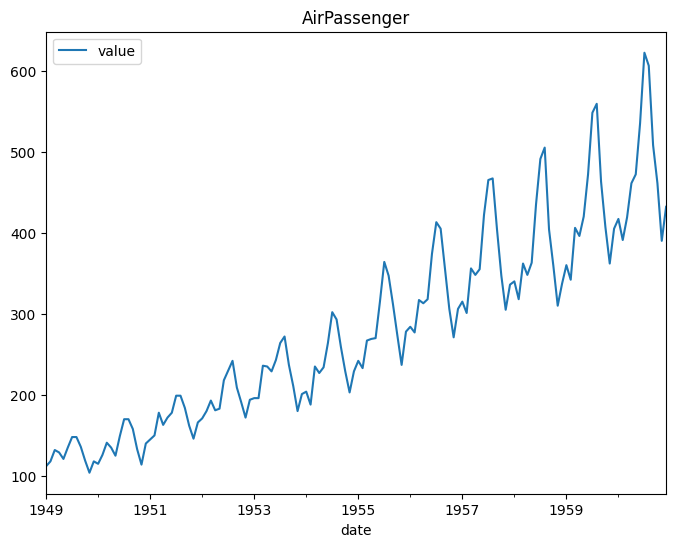

In [ ]:
df.plot(figsize=(8,6), title='AirPassenger')

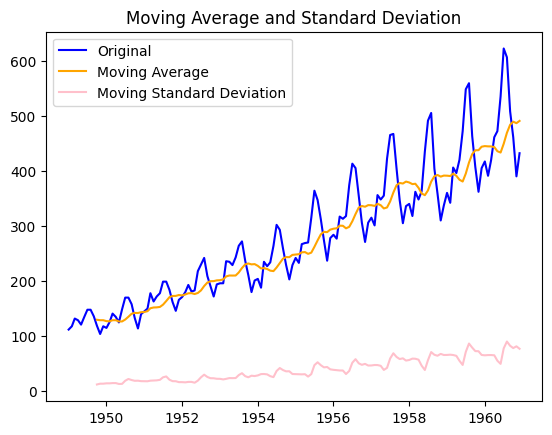

In [ ]:
movingavg = df.rolling(window=10).mean()
movingSTD = df.rolling(window=10).std()
plt.plot(df['value'], color='blue', label='Original')
plt.plot(movingavg, color='orange', label='Moving Average')
plt.plot(movingSTD, color='pink', label='Moving Standard Deviation')
plt.legend(loc='best')
plt.title('Moving Average and Standard Deviation')
plt.show()

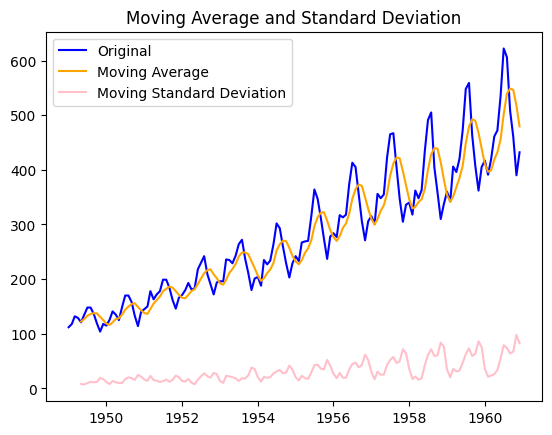

In [ ]:
movingavg = df.rolling(window=5).mean()
movingSTD = df.rolling(window=5).std()
plt.plot(df['value'], color='blue', label='Original')
plt.plot(movingavg, color='orange', label='Moving Average')
plt.plot(movingSTD, color='pink', label='Moving Standard Deviation')
plt.legend(loc='best')
plt.title('Moving Average and Standard Deviation')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF test is conducted with the following assumptions:


*   Null Hypothesis(HO): Series is non stationary, or series has a unit root.
*   Alternate Hypothesis (HA): Series is stationary, or series has no unit root.

if the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

Conditions to Reject Null Hypothesis(HO)



*   if Test statistic < Critical Value and p-value < 0.05 = Reject Null Hypothesis(HO), i.e, time series does not have a unit root, meaning its stationary.

In [ ]:
#ADF TEST
def adf_test(timeseries):
  print("Results of Dickey-Fuller Test: ")
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
  print(dfoutput)
  #Call the function and run the test

adf_test(df['value'])

Results of Dickey-Fuller Test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


The test statistic is 0.815369, which is greater than any of the cricial values.

So we accept the Null Hypothesis because both P value and the Critical value are greater than the condition. So series is non-stationary

**Kwiatkowski-Philips-Schmidt-Shin(KPSS) Test**

The KPSS test is conducted with the following assumptions.


*   if the Test Statistic < Critical Value and p-value < 0.05 = Fail to Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is trend stationary.


In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(timeseries):
  print("Results of KPSS Test: ")
  kpsstest = kpss(timeseries, regression='c')
  kpss_output = pd.Series(kpsstest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  for key, value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print(kpss_output)
  #Call the function and run the test

kpss_test(df['value'])

Results of KPSS Test: 
Test Statistic                                                          1.651312
p-value                                                                     0.01
Lags Used                                                                      8
Number of Observations Used    {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
Critical Value (10%)                                                       0.347
Critical Value (5%)                                                        0.463
Critical Value (2.5%)                                                      0.574
Critical Value (1%)                                                        0.739
dtype: object


<ipython-input-19-54b2457c0a14>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


**Making a Time Series Stationary**

**Differencing**

yt = yt - y(t-1)

where yt is the value at time t

<Axes: xlabel='date'>

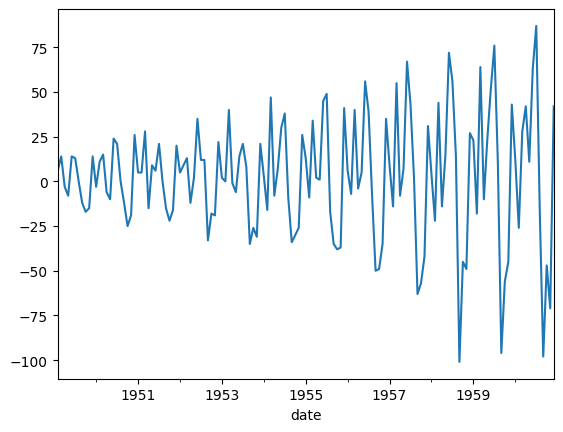

In [ ]:
df['value_diff'] = df['value'] - df['value'].shift(1)
df['value_diff'].dropna().plot()

**Seasonal Differencing**
yt = yt - y(t-n)

<Axes: xlabel='date'>

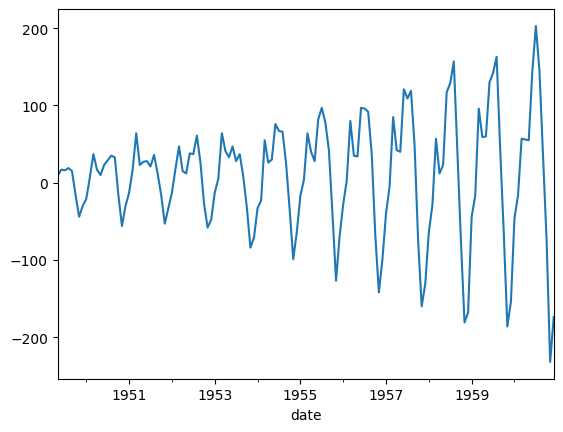

In [ ]:
n=4
df['value_diff_seasonal'] = df['value'] - df['value'].shift(n)
df['value_diff_seasonal'].dropna().plot()

**Transformation** common transformation methods include power transform, square root and log transform

Value small power transformation
Huge value but std deviation is small then square root transformation
Range Different then log transformation

In [ ]:
import numpy as np
df['value_log'] = np.log(df['value'])

<Axes: xlabel='date'>

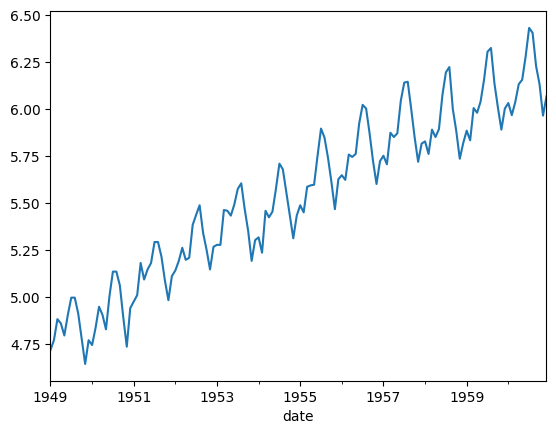

In [ ]:
df['value_log'].plot()

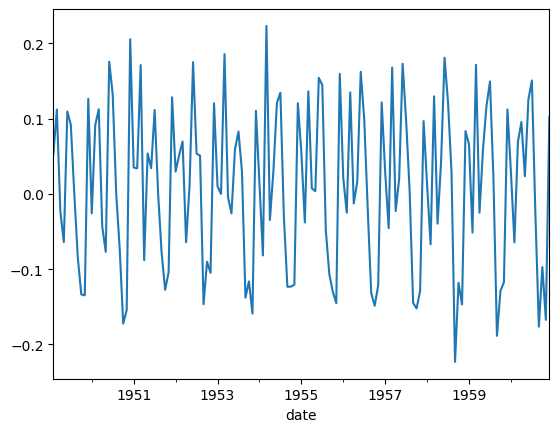

In [ ]:
df['value_log']= np.log(df['value'])
df['value_log_diff'] = df['value_log'] - df['value_log'].shift(1)
df['value_log_diff'].dropna().plot()
plt.show()

Components of Time Series


*   Additive Model = y(t) = Trend + Seasonality + Residual

*  Multiplicativve Model = y(t) = Trend * Seasonality * Residual

Use an Additive model when:


*   Seasonality is constant over time
*   Trend and Seasonality are independent

Use an Multiplicative when


*   Seasonality increases or decreases over time
*   Trend and Seasonality are Dependant







For Additive

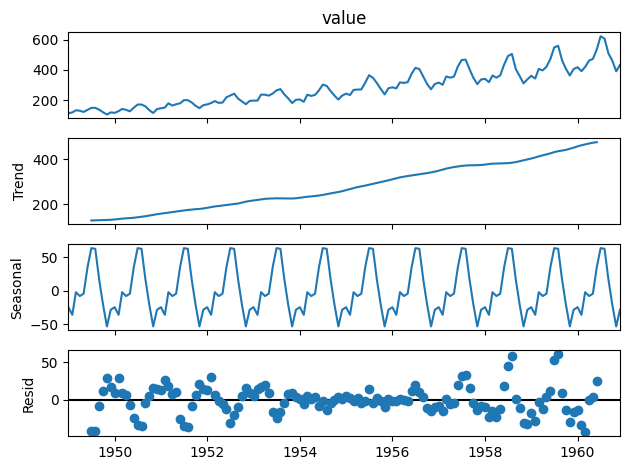

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['value'], model='additive')
#model = additive
decomposition.plot()
plt.show()

For Multiplicative

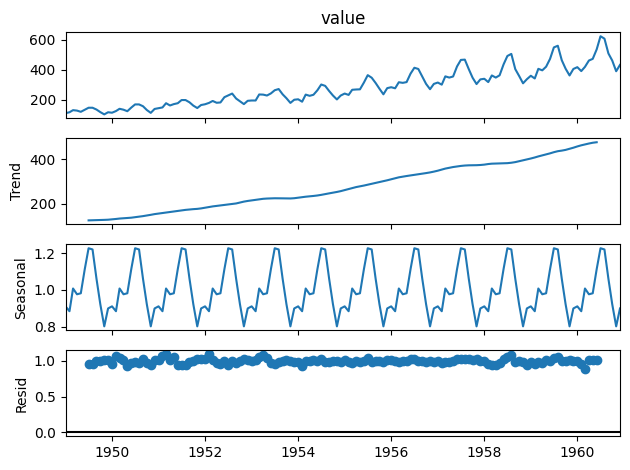

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['value'], model='multiplicative')
#model = additive
decomposition.plot()
plt.show()

**Auto Correlation**

if towards +1 more +ve corelated
if towards -1 more -ve corelated.


The blue shade area is the significant level.
which ever is just above the shade area is the P value
and then which is having the highest peak in the partial autocorrelation is the lag value. which is the Q value

These two plots will help us identify the P and Q value.



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

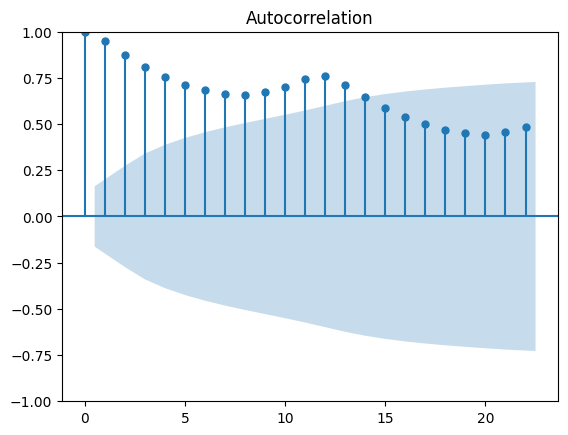

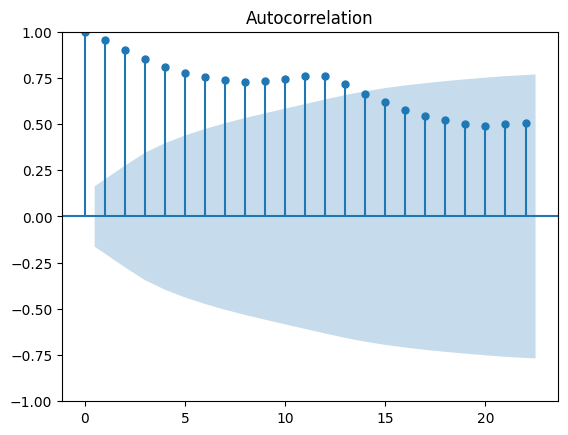

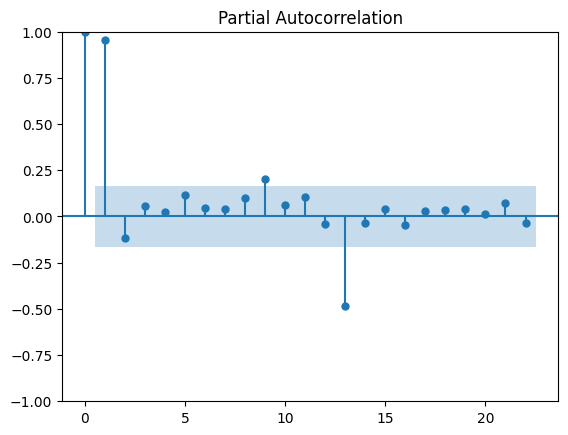

In [ ]:
plot_acf(df['value'])
plt.show()

plot_acf(df['value_log'])
plt.show()
plot_pacf(df['value_log'])
plt.show()

ARIMA = Auto Regressive and Moving Average

its denoted as ARIMA(p,d,q) where:
p is number of lag observations (AR terms)
d is number of times the data is differenced (l terms)
q is number of lagged forecast error

Here the P value is 2 and the Q value is 13.

The last spike which is outside the significant. Like that we got the P value which is 2. In the partial autocorrelation.

Since 2 is the bigger spike we choose 2 for the arima model.
ARIMA(p,d,q) -> 2,1,2

Always we omit the zeroes. And we check up only within that significant level area.

d is the differencing

Residual is actual - predicted value.
RSS - its the residual sum of squares.


ARIMA has the less error so its the best model.

order(2,1,0) - 2.1398
order(0,1,2) -

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


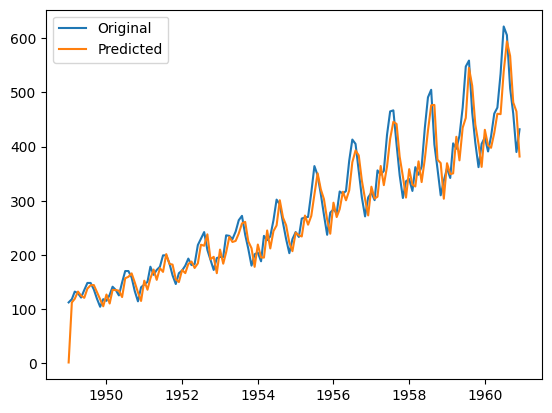

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['value_log'], order=(2,1,2))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict()

# Inverse the log transformation
predictions_original_scale = np.exp(predictions)

# Plot the original and predicted values
plt.plot(df['value'], label='Original')
plt.plot(predictions_original_scale, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# prompt: Find the RSS value and value log for the Auto Regressive

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('/content/AirPassengers.csv')

df['value_log'] = np.log(df['value'])

# Fit the ARIMA model
model = ARIMA(df['value_log'], order=(2,1,2))
model_fit = model.fit()

# Calculate the RSS
RSS = model_fit.resid.sum() ** 2

print("RSS:", RSS)
print("Value log:", df['value_log'])


RSS: 58.474143862741556
Value log: 0      4.718499
1      4.770685
2      4.882802
3      4.859812
4      4.795791
         ...   
139    6.406880
140    6.230481
141    6.133398
142    5.966147
143    6.068426
Name: value_log, Length: 144, dtype: float64


In [ ]:
import numpy as np

rss_value = np.sum((df['value'] - df['value'].mean())**2)
rss_log_value = np.sum((df['value_log'] - df['value_log'].mean())**2)

print("RSS of value:", rss_value)
print("RSS of log value:", rss_log_value)


RSS of value: 2058044.159722222
RSS of log value: 27.868379751313192


In [ ]:
# For MA
model = ARIMA(df['value_log'], order=(0,1,2))
model_fit = model.fit()
rss_ma_value = np.sum((model_fit.resid)**2)
print("RSS of MA:", rss_ma_value)

# For ARIMA you already have it in your code
model = ARIMA(df['value_log'], order=(2,1,2))
model_fit = model.fit()
rss_arima_value = np.sum((model_fit.resid)**2)
print("RSS of ARIMA:", rss_arima_value)

# For AR
model = ARIMA(df['value_log'], order=(2,1,0))
model_fit = model.fit()
rss_ar_value = np.sum((model_fit.resid)**2)
print("RSS of AR:", rss_ar_value)

RSS of MA: 23.75282149709915
RSS of ARIMA: 23.64212844578515
RSS of AR: 23.778053553234475


In [ ]:
# For AR with value
model_ar_value = ARIMA(df['value'], order=(2,1,0))
model_ar_value_fit = model_ar_value.fit()
rss_ar_value = np.sum((model_ar_value_fit.resid)**2)
print("RSS of AR (value):", rss_ar_value)

# For MA with value
model_ma_value = ARIMA(df['value'], order=(0,1,2))
model_ma_value_fit = model_ma_value.fit()
rss_ma_value = np.sum((model_ma_value_fit.resid)**2)
print("RSS of MA (value):", rss_ma_value)

# For ARIMA with value
model_arima_value = ARIMA(df['value'], order=(2,1,2))
model_arima_value_fit = model_arima_value.fit()
rss_arima_value = np.sum((model_arima_value_fit.resid)**2)
print("RSS of ARIMA (value):", rss_arima_value)

# For AR with log value
model_ar_log = ARIMA(df['value_log'], order=(2,1,0))
model_ar_log_fit = model_ar_log.fit()
rss_ar_log = np.sum((model_ar_log_fit.resid)**2)
print("RSS of AR (log value):", rss_ar_log)

# For MA with log value
model_ma_log = ARIMA(df['value_log'], order=(0,1,2))
model_ma_log_fit = model_ma_log.fit()
rss_ma_log = np.sum((model_ma_log_fit.resid)**2)
print("RSS of MA (log value):", rss_ma_log)

# For ARIMA with log value
model_arima_log = ARIMA(df['value_log'], order=(2,1,2))
model_arima_log_fit = model_arima_log.fit()
rss_arima_log = np.sum((model_arima_log_fit.resid)**2)
print("RSS of ARIMA (log value):", rss_arima_log)

RSS of AR (value): 152347.61616545467
RSS of MA (value): 152619.4552524783


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RSS of ARIMA (value): 110035.99187358966
RSS of AR (log value): 23.778053553234475
RSS of MA (log value): 23.75282149709915
RSS of ARIMA (log value): 23.64212844578515
